In [1]:
# Add matplotlib magic command
%matplotlib inline

# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np

In [2]:
# Prep files and paths
city_data_df = pd.read_csv("Resources/city_data.csv")
ride_data_df = pd.read_csv("Resources/ride_data.csv")

In [3]:
# read city data file
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# read ride data file
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
# check city data file for nulls
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [6]:
# check city data file for data types
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [7]:
# check city data file for total data points
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [8]:
# what values are used in the type column?
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
# find sum of data points per type 
print(sum(city_data_df['type']=='Urban'), 
sum(city_data_df['type']=='Suburban'),
sum(city_data_df['type']=='Rural'))

66 36 18


In [10]:
# check ride data file for nulls
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [11]:
# check ride data file for data types
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [12]:
# merge dataframes
pyber_data_df = pd.merge(ride_data_df, city_data_df, how='left', on=['city', 'city'])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [13]:
# create a dataframe for each city type
urban_cities_df = pyber_data_df[pyber_data_df["type"] == 'Urban']
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == 'Suburban']
rural_cities_df = pyber_data_df[pyber_data_df["type"] == 'Rural']
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [14]:
# DF1: find total number of rides for each city by city type
urban_ride_count = urban_cities_df.groupby(["city"]).count()['ride_id']
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()['ride_id']
rural_ride_count = rural_cities_df.groupby(["city"]).count()['ride_id']

In [15]:
# DF2: average fares for each city by city type
urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']
suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']


In [16]:
# DF3: find average number of drivers by city type
urban_avg_driver = urban_cities_df.groupby(['city']).mean()['driver_count']
suburban_avg_driver = suburban_cities_df.groupby(['city']).mean()['driver_count']
rural_avg_driver = rural_cities_df.groupby(['city']).mean()['driver_count']

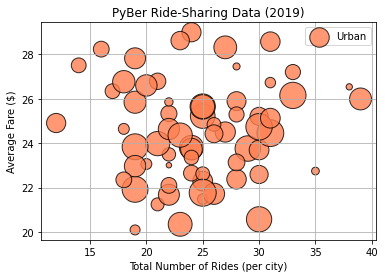

In [17]:
# bubble plot for urban cities
plt.scatter(urban_ride_count,urban_avg_fare,c="coral",s=urban_avg_driver*10, alpha=0.8, edgecolor='black', linewidths=1, label='Urban')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (per city)')
plt.ylabel('Average Fare ($)')
plt.grid(True)
plt.legend()

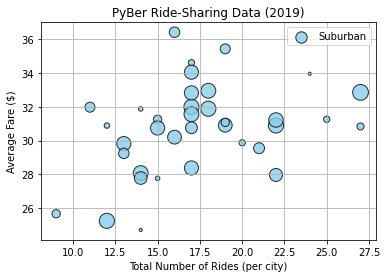

In [18]:
# bubble plot for suburban cities
plt.scatter(suburban_ride_count,suburban_avg_fare,c="skyblue",s=suburban_avg_driver*10, alpha=0.8, edgecolor='black', linewidths=1, label='Suburban')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (per city)')
plt.ylabel('Average Fare ($)')
plt.grid(True)
plt.legend()

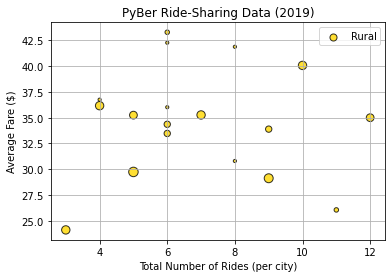

In [19]:
# bubble plot for rural cities
plt.scatter(rural_ride_count,rural_avg_fare,c="gold",s=rural_avg_driver*10, alpha=0.8, edgecolor='black', linewidths=1, label='Rural')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (per city)')
plt.ylabel('Average Fare ($)')
plt.grid(True)
plt.legend()

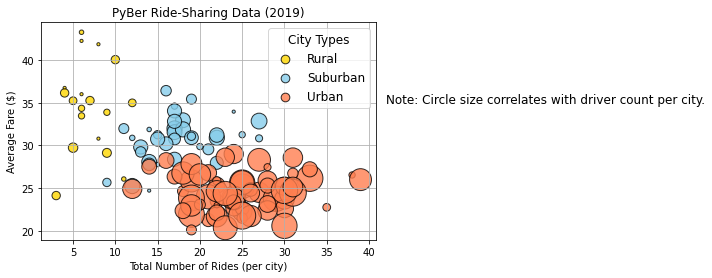

In [20]:
# run each city type chart in one cell to merge

# bubble plot for rural cities
plt.scatter(rural_ride_count,rural_avg_fare,c="gold",s=rural_avg_driver*10, alpha=0.8, edgecolor='black', linewidths=1, label='Rural')

# bubble plot for suburban cities
plt.scatter(suburban_ride_count,suburban_avg_fare,c="skyblue",s=suburban_avg_driver*10, alpha=0.8, edgecolor='black', linewidths=1, label='Suburban')

# bubble plot for urban cities
plt.scatter(urban_ride_count,urban_avg_fare,c="coral",s=urban_avg_driver*10, alpha=0.8, edgecolor='black', linewidths=1, label='Urban')

# other graph properties
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (per city)')
plt.ylabel('Average Fare ($)')
plt.grid(True)
# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

plt.savefig("analysis/Fig1.png")

plt.show()



In [21]:
# get descriptive stats for urban
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [22]:
# get descriptive stats for suburban
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [23]:
# get descriptive stats for rural
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [24]:
# get descriptive stats for urban ride counts
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [25]:
# get descriptive stats for suburban ride counts
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [26]:
# get descriptive stats for rural ride counts
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [27]:
# calculate mean for each city type via pandas
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [28]:
# calculate median for each city type via pandas
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [29]:
# calculate mode for each city type via pandas
urban_ride_count.mode(), suburban_ride_count.mode(), rural_ride_count.mode()

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [30]:
# new dependency
import scipy.stats as sts

In [31]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [32]:
# Calculate the measures of central tendency for the ride count for the suburban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [33]:
# Calculate the measures of central tendency for the ride count for the rural cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for suburban trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [34]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
suburban_fares = suburban_cities_df['fare']
rural_fares = rural_cities_df['fare']

In [35]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [36]:
# Calculate the measures of central tendency for the average fare for the suburban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [37]:
# Calculate the measures of central tendency for the average fare for the rural cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [38]:
# series for urban driver count
urban_driver_counts = urban_cities_df['driver_count']
suburban_driver_counts = suburban_cities_df['driver_count']
rural_driver_counts = rural_cities_df['driver_count']

In [39]:
# Calculate the measures of central tendency for the average drivers for the suburban cities.
mean_suburban_driver_counts = np.mean(suburban_driver_counts)
print(f"The mean number of drivers in suburban trips is ${mean_suburban_driver_counts:.2f}.")

median_suburban_driver_counts = np.median(suburban_driver_counts)
print(f"The median number of drivers in suburban trips is ${median_suburban_driver_counts:.2f}.")

mode_suburban_driver_counts = sts.mode(suburban_driver_counts)
print(f"The mode number of drivers in suburban trips is {mode_suburban_driver_counts}.")

The mean number of drivers in suburban trips is $13.71.
The median number of drivers in suburban trips is $16.00.
The mode number of drivers in suburban trips is ModeResult(mode=array([20], dtype=int64), count=array([79])).


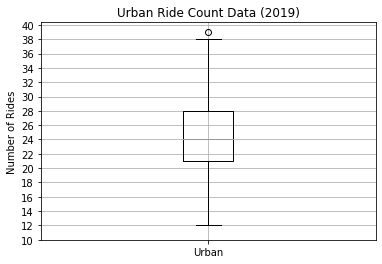

In [40]:
# Create labels for plot
x_labels = ['Urban']

# Create box and whisker plot for urban cities ride count
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
ax.set_title('Urban Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2))
ax.grid()
plt.show()

In [41]:
# Summary statistics for suburban
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [42]:
# Summary statistics for urban
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [43]:
# Summary statistics for rural
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

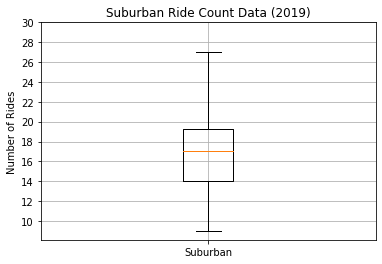

In [44]:
# Create labels for plot
x_labels = ['Suburban']

# Create box and whisker plot for suburban cities ride count
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)
ax.set_title('Suburban Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 32, step=2))
ax.grid()
plt.show()

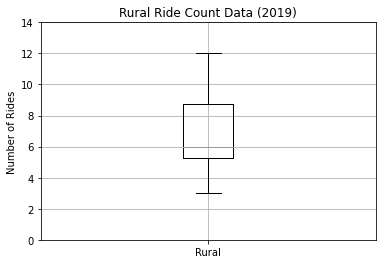

In [45]:
# Create labels for plot
x_labels = ['Rural']

# Create box and whisker plot for Rural cities ride count
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)
ax.set_title('Rural Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(0, 15, step=2))
ax.grid()
plt.show()

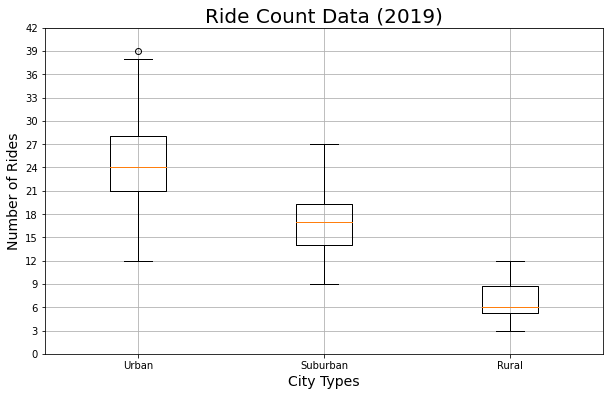

In [46]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('Ride Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Rides', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0,45,step=3.0))
ax.grid()

plt.savefig('analysis/Fig2.png')

plt.show()

In [47]:
# get the city that had the outlier, 39 rides.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


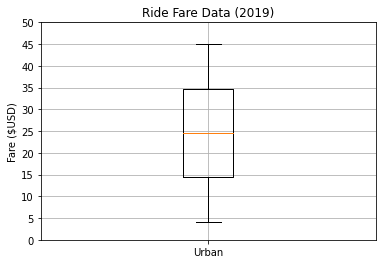

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [48]:
# generate box plot for urban fare data
x_labels = ["Urban"]

fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)

# add the formatting
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare ($USD)')
ax.set_yticks(np.arange(0,51,step=5))
ax.grid()
plt.show()

print("Summary Statistics")
urban_fares.describe()

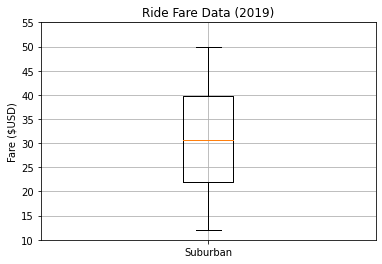

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [49]:
# generate box plot for suburban fare data
x_labels = ["Suburban"]

fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)

# add the formatting
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare ($USD)')
ax.set_yticks(np.arange(10,56,step=5))
ax.grid()
plt.show()

print("Summary Statistics")
suburban_fares.describe()

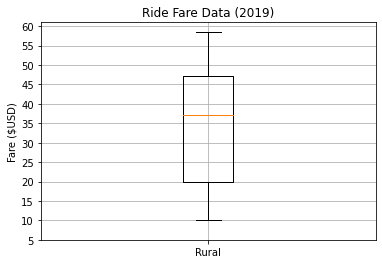

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [50]:
# generate box plot for rural fare data
x_labels = ["Rural"]

fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)

# add the formatting
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare ($USD)')
ax.set_yticks(np.arange(5,61,step=5))
ax.grid()
plt.show()

print("Summary Statistics")
rural_fares.describe()

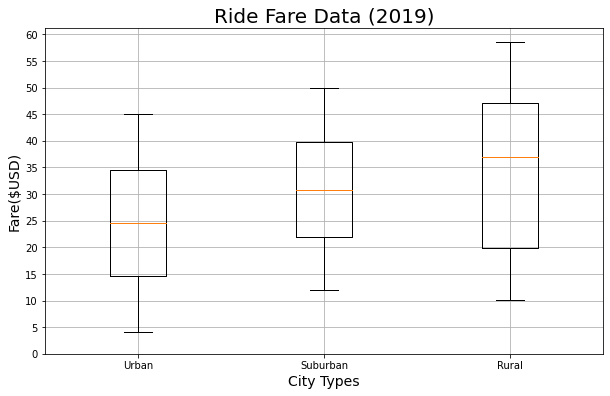

In [51]:
# Add all fare box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban", "Rural"]
ride_fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('Ride Fare Data (2019)', fontsize=20)
ax.set_ylabel('Fare($USD)', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.boxplot(ride_fare_data, labels=x_labels)
ax.set_yticks(np.arange(0,61,step=5.0))
ax.grid()

# save png
plt.savefig("analysis/Fig3.png")

plt.show()

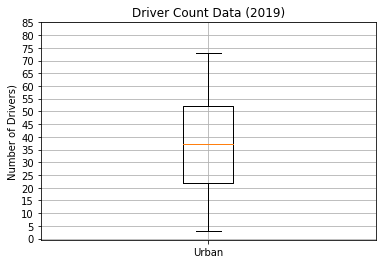

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [52]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_driver_counts,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_driver_counts.describe()

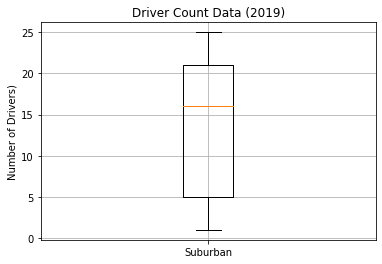

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [53]:
# Create the box-and-whisker plot for the suburban driver count data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_driver_counts,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 26, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_driver_counts.describe()

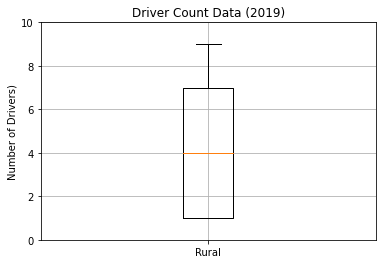

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [54]:
# Create the box-and-whisker plot for the rural driver count data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_driver_counts,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 11, step=2.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_driver_counts.describe()

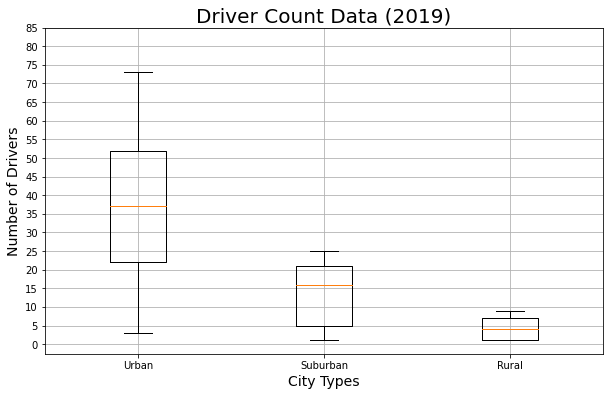

In [56]:
# Add all fare box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban", "Rural"]
ride_fare_data = [urban_driver_counts, suburban_driver_counts, rural_driver_counts]
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('Driver Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Drivers', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.boxplot(ride_fare_data, labels=x_labels)
ax.set_yticks(np.arange(0,90,step=5.0))
ax.grid()

# save png
plt.savefig("analysis/Fig4.png")

plt.show()

In [57]:
# Create ds indexed by type and displays sum of fares for city type
sum_fares_by_type = pyber_data_df.groupby(['type']).sum()['fare']
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [61]:
# get sum of all fares
total_fares = pyber_data_df['fare'].sum()
total_fares

63538.64

In [63]:
# calculate percentage of fare for each type of city
type_percents = (sum_fares_by_type / total_fares) * 100
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

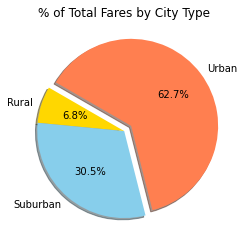

In [70]:
# import matplotlib library to access rcParams
import matplotlib as mpl

# Create pie chart to visualize percent fare for each city type
explode_values = [0,0,0.1]
colors = ['gold', 'skyblue','coral']
plt.pie(type_percents, 
        labels=['Rural','Suburban','Urban'],
        explode = explode_values,
        colors = colors,
        shadow = True,
        startangle=150,
        autopct='%1.1f%%')
plt.title('% of Total Fares by City Type')

# Change default fontsize from 10 to 14
mpl.rcParams['font.size'] = 14

# Save figure
plt.savefig('analysis/Fig5.png')

plt.show()